In [ ]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from PIL import Image
from scipy.ndimage import sobel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


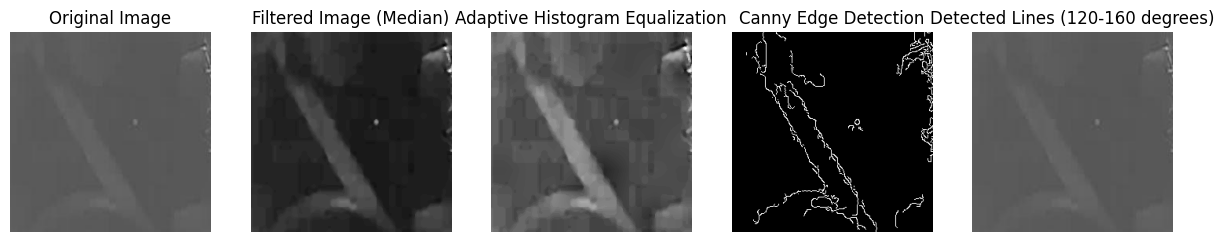

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C220-2023083013404_driver.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img_gray = cv2.medianBlur(gray, 5)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(filtered_img_gray)


edges = cv2.Canny(equ, threshold1=40, threshold2=15, apertureSize=3)

angle_min = np.radians(120)
angle_max = np.radians(160)

lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=25)

image_with_lines = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1)
        if angle_min <= angle <= angle_max:
            cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

image_with_lines = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1)
        if angle_min <= angle <= angle_max:
            cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)



plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(filtered_img_gray, cmap='gray')
plt.title('Filtered Image (Median)')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(equ, cmap='gray')
plt.title('Adaptive Histogram Equalization')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines (120-160 degrees)')
plt.axis('off')

plt.show()

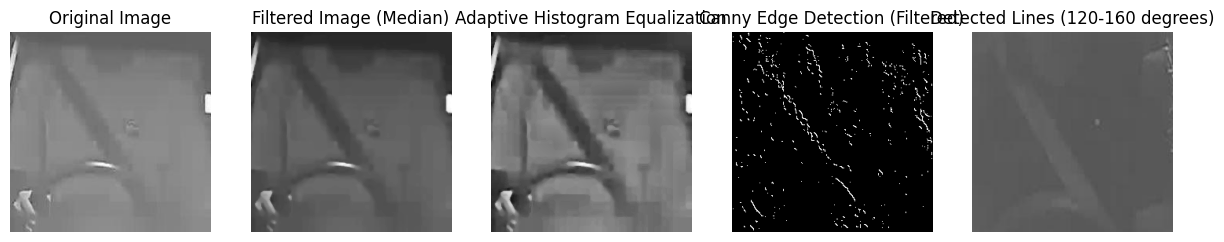

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082707024_driver.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img_gray = cv2.medianBlur(gray, 5)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(filtered_img_gray)

edges = cv2.Canny(equ, threshold1=1, threshold2=1, apertureSize=7)
sobelx = cv2.Sobel(filtered_img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(filtered_img_gray, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(sobelx**2 + sobely**2)
orientation = np.arctan2(sobely, sobelx)

angle_min = np.radians(110)
angle_max = np.radians(170)

edges_filtered = np.zeros_like(edges, dtype=np.uint8)
edges_filtered[(orientation >= angle_min) & (orientation <= angle_max) & (edges > 0)] = 255

plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(filtered_img_gray, cmap='gray')
plt.title('Filtered Image (Median)')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(equ, cmap='gray')
plt.title('Adaptive Histogram Equalization')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(edges_filtered, cmap='gray')
plt.title('Canny Edge Detection (Filtered)')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines (120-160 degrees)')
plt.axis('off')
plt.show()

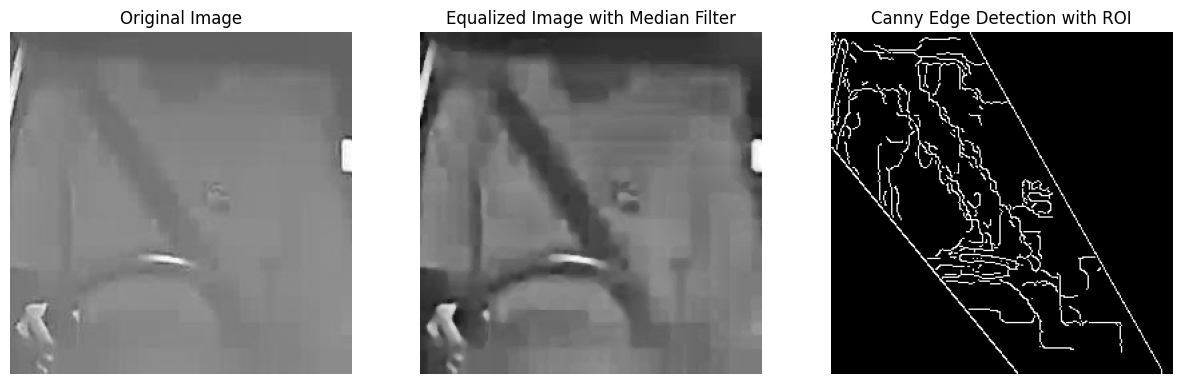

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082707024_driver.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median_blur = cv2.medianBlur(gray, 5)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(median_blur)

roi_vertices = np.array([[(0,0), (0, 80), (180, 300), (270, 300), (100, 0)]], dtype=np.int32)
mask = np.zeros_like(equ)
cv2.fillPoly(mask, roi_vertices, 255)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel)
masked_roi = cv2.bitwise_and(equ, mask)


edges = cv2.Canny(masked_roi, threshold1=40, threshold2=25, apertureSize=3)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image with Median Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection with ROI')
plt.axis('off')
plt.show()


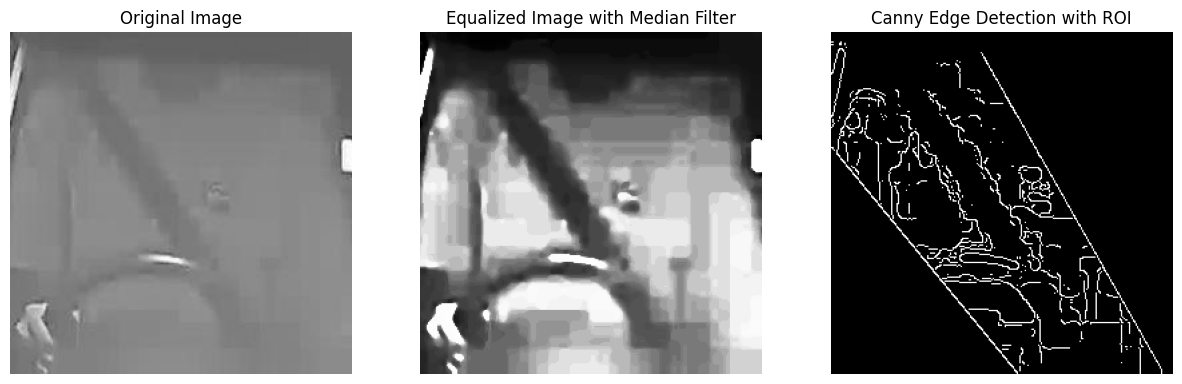

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082707024_driver.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median_blur = cv2.medianBlur(gray, 5)
equ = cv2.equalizeHist(median_blur)

roi_vertices = np.array([[(0,0), (0, 80), (180, 300), (270, 300), (100, 0)]], dtype=np.int32)
mask = np.zeros_like(equ)
cv2.fillPoly(mask, roi_vertices, 255)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel)
masked_roi = cv2.bitwise_and(equ, mask)

edges = cv2.Canny(masked_roi, threshold1=90, threshold2=90, apertureSize= 3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image with Median Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection with ROI')
plt.axis('off')
plt.show()

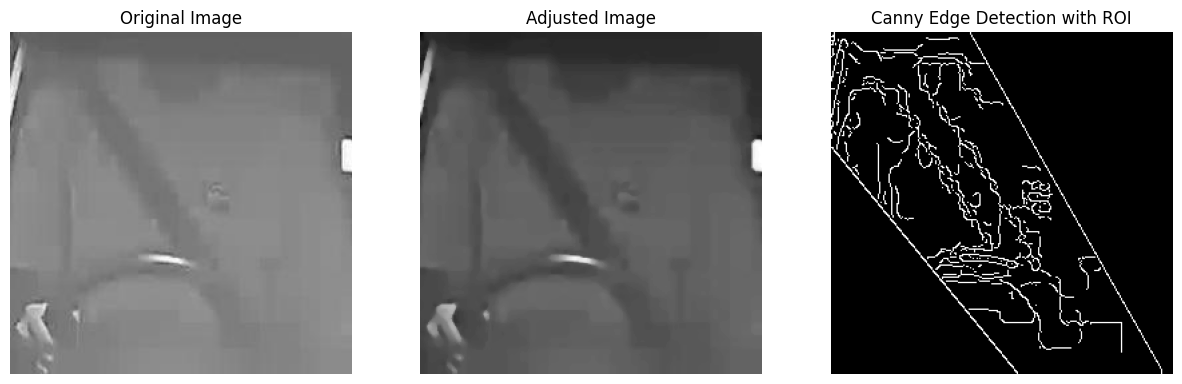

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imadjust(img, low_in, high_in, low_out, high_out):
    """
    Adjusts the intensity values of an image to enhance contrast.

    Parameters:
        img: Input image (grayscale)
        low_in: Lower bound of the input intensity range
        high_in: Upper bound of the input intensity range
        low_out: Lower bound of the output intensity range
        high_out: Upper bound of the output intensity range

    Returns:
        Adjusted image
    """

    clipped = np.clip(img, low_in, high_in)
    adjusted = (clipped - low_in) / (high_in - low_in) * (high_out - low_out) + low_out
    adjusted = np.clip(adjusted, low_out, high_out)
    return adjusted.astype(np.uint8)

image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082707024_driver.jpg'
img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median_blur = cv2.medianBlur(gray, 5)
adjusted = imadjust(median_blur, np.min(median_blur), np.max(median_blur), 0, 255)


roi_vertices = np.array([[(0,0), (0, 80), (180, 300), (270, 300), (100, 0)]], dtype=np.int32)
mask = np.zeros_like(adjusted)
cv2.fillPoly(mask, roi_vertices, 255)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel)
masked_roi = cv2.bitwise_and(adjusted, mask)

edges = cv2.Canny(masked_roi, threshold1=20, threshold2=15, apertureSize=3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adjusted, cmap='gray')
plt.title('Adjusted Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection with ROI')
plt.axis('off')
plt.show()

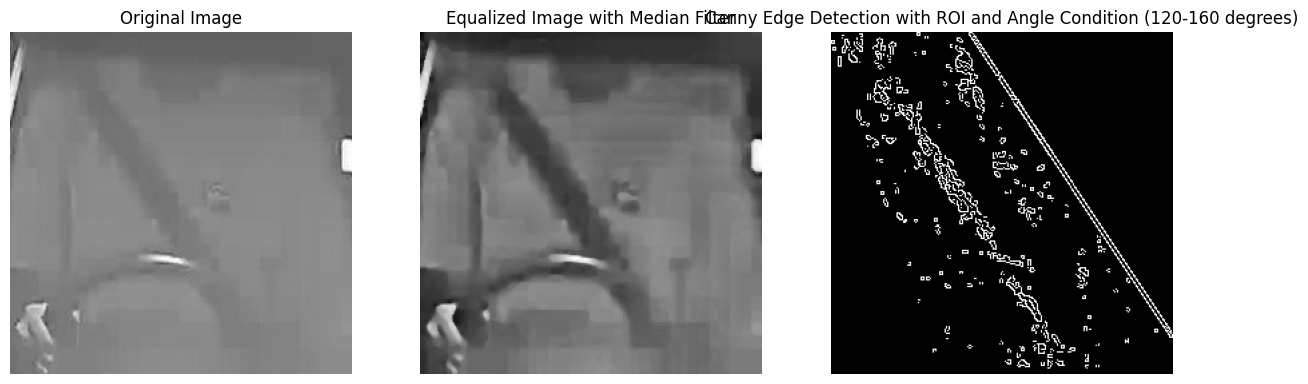

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082707024_driver.jpg'
img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median_blur = cv2.medianBlur(gray, 5)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(median_blur)

roi_vertices = np.array([[(0, 0), (100, 300), (300, 300), (100, 0)]], dtype=np.int32)
mask = np.zeros_like(equ)
cv2.fillPoly(mask, roi_vertices, 255)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel)
masked_roi = cv2.bitwise_and(equ, mask)

grad_x = cv2.Sobel(masked_roi, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(masked_roi, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_dir = np.arctan2(grad_y, grad_x) * (180 / np.pi)

edges_filtered = np.zeros_like(grad_mag)
edges_filtered[(grad_dir >= 110) & (grad_dir <= 170)] = grad_mag[(grad_dir >= 110) & (grad_dir <= 170)]
edges = cv2.Canny(np.uint8(edges_filtered), threshold1=40, threshold2=25, apertureSize=3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image with Median Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection with ROI and Angle Condition (120-160 degrees)')
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

def process_image(image_path):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    median_blur = cv2.medianBlur(gray, 5)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    equ = clahe.apply(median_blur)

    roi_vertices = np.array([[(0, 0), (100, 300), (300, 300), (100, 0)]], dtype=np.int32)
    mask = np.zeros_like(equ)
    cv2.fillPoly(mask, roi_vertices, 255)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel)
    masked_roi = cv2.bitwise_and(equ, mask)

    edges = cv2.Canny(masked_roi, threshold1=40, threshold2=25, apertureSize=3)
    return edges

input_folder = '/content/drive/MyDrive/RESIZED SEATBELT'
output_zip_path = '/content/output_images.zip'


with zipfile.ZipFile(output_zip_path, 'w') as zip_file:
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            image_path = os.path.join(input_folder, filename)
            edges = process_image(image_path)

            output_image_path = os.path.join('output_images', filename)
            zip_file.writestr(output_image_path, cv2.imencode('.jpg', edges)[1])

print("All images processed and saved to", output_zip_path)

All images processed and saved to /content/output_images.zip


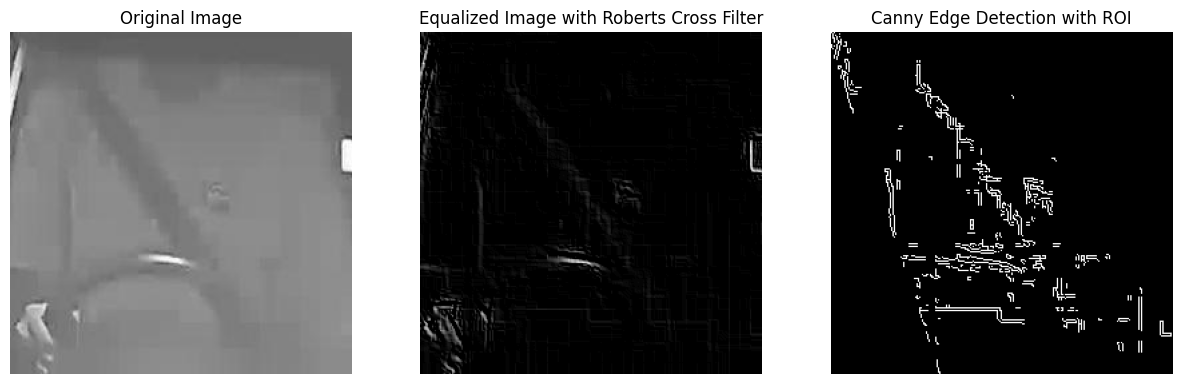

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082707024_driver.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roberts_kernel = np.array([[0, 0, 0],
                           [0, 0, 1],
                           [0, -1, 0]], dtype=np.float32)
roberts_filtered = cv2.filter2D(gray, -1, roberts_kernel)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(roberts_filtered)

roi_vertices = np.array([[(0, 0), (100, 300), (300, 300), (100, 0)]], dtype=np.int32)
mask = np.zeros_like(equ)
cv2.fillPoly(mask, roi_vertices, 255)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel)
masked_roi = cv2.bitwise_and(equ, mask)

edges = cv2.Canny(masked_roi, threshold1=40, threshold2=25, apertureSize=3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image with Roberts Cross Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection with ROI')
plt.axis('off')
plt.show()

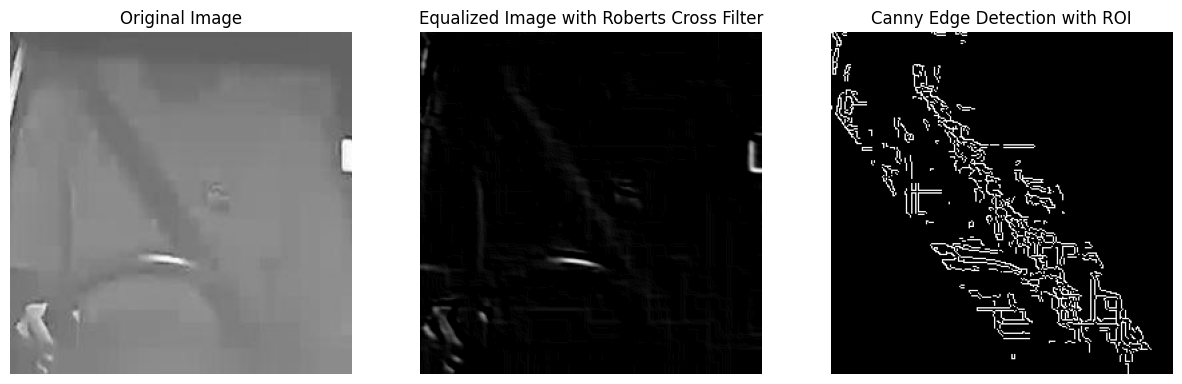

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082707024_driver.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 5), 0)

roberts_kernel = np.array([[0, 0, 0],
                           [0, 0, 1],
                           [0, -1, 0]], dtype=np.float32)
roberts_filtered = cv2.filter2D(blurred, -1, roberts_kernel)
roberts_filtered = cv2.normalize(roberts_filtered, None, 0, 255, cv2.NORM_MINMAX)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(roberts_filtered)

roi_vertices = np.array([[(0,0), (0, 50), (180, 300), (270, 300), (100, 0)]], dtype=np.int32)
mask = np.zeros_like(equ)
cv2.fillPoly(mask, roi_vertices, 255)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel)
masked_roi = cv2.bitwise_and(equ, mask)

edges = cv2.Canny(masked_roi, threshold1=40, threshold2=25, apertureSize=3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image with Roberts Cross Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection with ROI')
plt.axis('off')
plt.show()

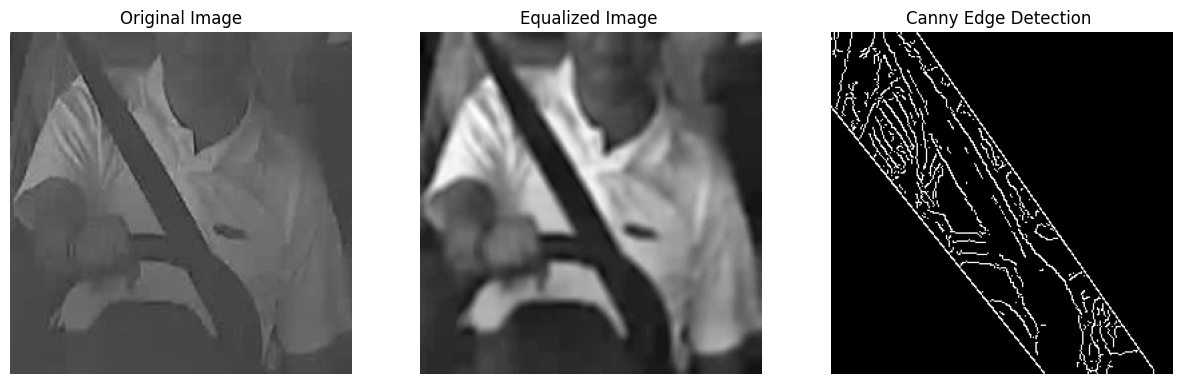

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/RESIZED SEATBELT/P22C210-2023082621230_driver.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.bilateralFilter(gray, 9, 200, 200)
blurred = cv2.normalize(blurred, None, 0, 255, cv2.NORM_MINMAX)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(blurred)

roi_vertices = np.array([[(0,0), (0, 50), (200, 300), (270, 300), (60, 0)]], dtype=np.int32)
mask = np.zeros_like(equ)
cv2.fillPoly(mask, roi_vertices, 255)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel)
masked_roi = cv2.bitwise_and(equ, mask)

edges = cv2.Canny(masked_roi, threshold1=40, threshold2=25, apertureSize=3)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection ')
plt.axis('off')
plt.show()

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
input_folder = '/content/drive/MyDrive/RESIZED NO SEATBELT/'
output_folder = '/content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.bilateralFilter(gray, 9, 75, 75)
        blurred = cv2.normalize(blurred, None, 0, 255, cv2.NORM_MINMAX)

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        equ = clahe.apply(blurred)

        roi_vertices = np.array([[(0, 0), (0, 50), (180, 300), (270, 300), (100, 0)]], dtype=np.int32)
        mask = np.zeros_like(equ)
        cv2.fillPoly(mask, roi_vertices, 255)
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.dilate(mask, kernel)
        masked_roi = cv2.bitwise_and(equ, mask)

        edges = cv2.Canny(masked_roi, threshold1=40, threshold2=25, apertureSize=3)

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, edges)

        print(f"Processed image saved: {output_path}")

print("All images processed and saved.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P71C550-2020121902368_driver.jpg
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P71C550-2020121417142_driver.jpg
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P71C820-2020033100092_driver.jpg
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P71C711-2020032301826_driver.jpg
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P71C710-2020032004638_driver.jpg
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P71C820-2020033100918_rider.jpg
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P71C820-2020021600408_driver.jpg
Processed image saved: /content/drive/MyDrive/RESIZEDBILATERALNOSEATBELTDATASET/P